<a href="https://colab.research.google.com/github/Durgaprasad-77/Covid-19-India-ARIMA-Forecast/blob/main/Covid_19_India_ARIMA_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10 , 6

In [55]:
pip install gspread

In [5]:
pip install PyOpenSSL

     |████████████████████████████████| 61kB 3.3MB/s 
     |████████████████████████████████| 3.2MB 11.1MB/s 


In [240]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('Covid 19 Statewise Time Series').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
data = pd.DataFrame.from_records(rows[1:],columns=rows[0])

[['Date', 'Date_YMD', 'Daily Confirmed', 'Total Confirmed', 'Daily Recovered', 'Total Recovered', 'Daily Deceased', 'Total Deceased'], ['20200130', '20200130', '1', '1', '0', '0', '0', '0'], ['20200131', '20200131', '0', '1', '0', '0', '0', '0'], ['20200201', '20200201', '0', '1', '0', '0', '0', '0'], ['20200202', '20200202', '1', '2', '0', '0', '0', '0'], ['20200203', '20200203', '1', '3', '0', '0', '0', '0'], ['20200204', '20200204', '0', '3', '0', '0', '0', '0'], ['20200205', '20200205', '0', '3', '0', '0', '0', '0'], ['20200206', '20200206', '0', '3', '0', '0', '0', '0'], ['20200207', '20200207', '0', '3', '0', '0', '0', '0'], ['20200208', '20200208', '0', '3', '0', '0', '0', '0'], ['20200209', '20200209', '0', '3', '0', '0', '0', '0'], ['20200210', '20200210', '0', '3', '0', '0', '0', '0'], ['20200211', '20200211', '0', '3', '0', '0', '0', '0'], ['20200212', '20200212', '0', '3', '0', '0', '0', '0'], ['20200213', '20200213', '0', '3', '1', '1', '0', '0'], ['20200214', '20200214', 

In [241]:
data

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,20200130,20200130,1,1,0,0,0,0
1,20200131,20200131,0,1,0,0,0,0
2,20200201,20200201,0,1,0,0,0,0
3,20200202,20200202,1,2,0,0,0,0
4,20200203,20200203,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...
432,20210406,20210406,115312,12799718,59714,11789610,630,165617
433,20210407,20210407,126276,12925994,59137,11848747,684,166301
434,20210408,20210408,131878,13057872,61829,11910576,802,167103
435,20210409,20210409,144945,13202817,77263,11987839,773,167876


In [242]:
data = data.drop(['Date_YMD','Total Confirmed','Daily Recovered','Total Recovered','Daily Deceased','Total Deceased'],axis = 1)

In [243]:
data

,Date,Daily Confirmed
0,20200130,1
1,20200131,0
2,20200201,0
3,20200202,1
4,20200203,1
...,...,...
432,20210406,115312
433,20210407,126276
434,20210408,131878
435,20210409,144945


In [245]:
datac

,Daily Confirmed
Date,
2020-01-30,1
2020-01-31,0
2020-02-01,0
2020-02-02,1
2020-02-03,1
...,...
2021-04-06,115312
2021-04-07,126276
2021-04-08,131878


In [246]:
data = datac.reset_index()


In [247]:
data

,Date,Daily Confirmed
0,2020-01-30,1
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,1
4,2020-02-03,1
...,...,...
432,2021-04-06,115312
433,2021-04-07,126276
434,2021-04-08,131878
435,2021-04-09,144945


In [52]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 10.6MB/s 
     |████████████████████████████████| 2.1MB 39.0MB/s 
     |████████████████████████████████| 9.5MB 39.0MB/s 
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [248]:
data=datac.astype(float)

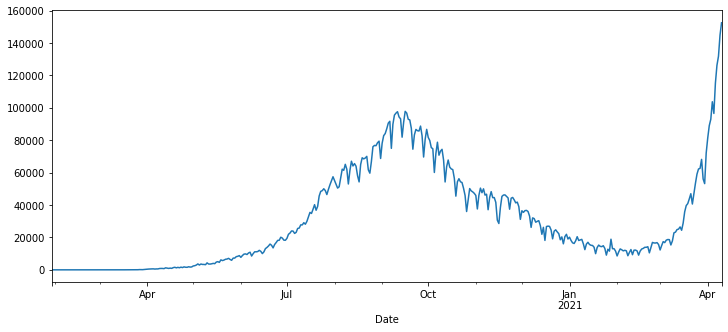

In [249]:
data['Daily Confirmed'].plot(figsize=(12,5))

In [250]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      
dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)



In [251]:
adf_test(data['Daily Confirmed'])

1. ADF :  -0.25432207232867104
2. P-Value :  0.9317291702322467
3. Num Of Lags :  17
4. Num Of Observations Used For ADF Regression: 419
5. Critical Values :
	 1% :  -3.4460536145702383
	 5% :  -2.868462751982839
	 10% :  -2.570457599182051


In [252]:
from pmdarima import auto_arima
import warnings 
warnings.filterwarnings("ignore")

In [253]:
stepwise_fit = auto_arima(data['Daily Confirmed'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=8457.008, Time=0.31 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=8790.176, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=8698.364, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=8475.072, Time=0.21 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=8468.096, Time=0.43 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=8462.780, Time=0.16 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=inf, Time=1.07 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=8403.115, Time=1.39 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=8408.522, Time=0.91 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=8387.226, Time=1.08 sec
 ARIMA(4,2,3)(0,0,0)[0]             : AIC=8389.089, Time=1.37 sec
 ARIMA(3,2,4)(0,0,0)[0]             : AIC=inf, Time=1.68 sec
 ARIMA(2,2,4)(0,0,0)[0]             : AIC=8420.211, Time=0.64 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=inf, Time=1.07 sec
 ARIMA(4,2,4)(0,0,0)[0]             : AIC=8389.6

In [94]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  437
Model:               SARIMAX(3, 2, 3)   Log Likelihood               -4186.613
Date:                Sun, 11 Apr 2021   AIC                           8387.226
Time:                        04:47:23   BIC                           8415.753
Sample:                             0   HQIC                          8398.485
                                - 437                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3780      0.069     -5.514      0.000      -0.512      -0.244
ar.L2         -0.9602      0.038    -25.138      0.000      -1.035      -0.885
ar.L3          0.0477      0.067      0.708      0.479      -0.084       0.180
ma.L1         -0.6237      0.040    -15.698      0.000      -0.702      -0.546
ma.L2          0.6282      0.032     19.847      0.000       0.566       0.690
ma.L3         -0.8684      0.035    -24.592      0.000      -0.938      -0.799
sigma2      1.855e+07   1.41e-09   1.32e+16      0.000    1.86e+07    1.86e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               216.11
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              70.96   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.31e+31. Standard errors may be unstable.
"""

In [254]:
print(data.shape)
train=data.iloc[:-30]
test=data.iloc[-30:]
print(train.shape,test.shape)

(437, 1)
(407, 1) (30, 1)


In [255]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Daily Confirmed'],order=(3,2,3))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:     D2.Daily Confirmed   No. Observations:                  405
Model:                 ARIMA(3, 2, 3)   Log Likelihood               -3839.609
Method:                       css-mle   S.D. of innovations           3113.828
Date:                Sun, 11 Apr 2021   AIC                           7695.219
Time:                        06:18:25   BIC                           7727.250
Sample:                    02-01-2020   HQIC                          7707.897
                         - 03-11-2021                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.1833      1.191     -0.994      0.320      -3.517       1.150
ar.L1.D2.Daily Confirmed    -0.6400      0.049    -12.964      0.000      -0.737      -0.543
ar.L2.D2.Daily Confirmed    -1.0613      0.025    -43.108      0.000      -1.110      -1.013
ar.L3.D2.Daily Confirmed    -0.1601      0.049     -3.254      0.001      -0.257      -0.064
ma.L1.D2.Daily Confirmed    -0.4186      0.018    -23.700      0.000      -0.453      -0.384
ma.L2.D2.Daily Confirmed     0.4183      0.017     24.038      0.000       0.384       0.452
ma.L3.D2.Daily Confirmed    -0.9997      0.025    -40.161      0.000      -1.048      -0.951
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2426           -0.9787j            1.0083           -0.2887
AR.2           -0.2426           +0.9787j            1.0083            0.2887
AR.3           -6.1438           -0.0000j            6.1438           -0.5000
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.2908           -0.9570j            1.0002           -0.2970
MA.3           -0.2908           +0.9570j            1.0002            0.2970
-----------------------------------------------------------------------------
"""

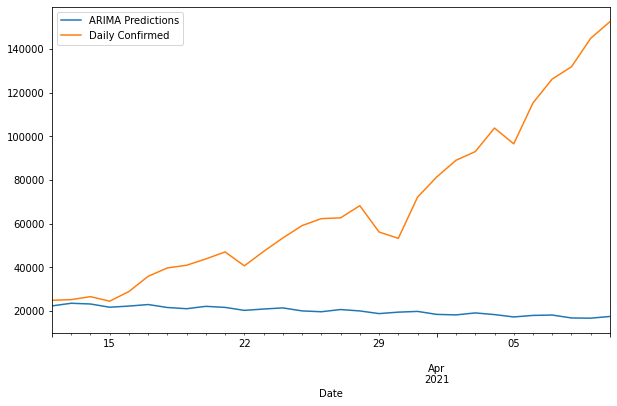

In [256]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Daily Confirmed'].plot(legend=True)

In [257]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['Daily Confirmed'].mean()
rmse=sqrt(mean_squared_error(pred,test['Daily Confirmed']))
print(rmse)

61696.120959626445


In [258]:

model2=ARIMA(data['Daily Confirmed'],order=(3,2,3))
model2=model2.fit()
data.tail()

,Daily Confirmed
Date,
2021-04-06,115312.0
2021-04-07,126276.0
2021-04-08,131878.0
2021-04-09,144945.0
2021-04-10,152565.0


In [321]:
index_future_dates=pd.date_range(start='2021-04-10',end='2021-5-10')
#print(index_future_dates)
predd=model2.predict(start=len(data),end=len(data)+30,typ='levels').rename('Covid19 India ARIMA Predictions')
#print(comp_pred)
predd.index=index_future_dates
print(predd)

2021-04-10    157940.366719
2021-04-11    159556.007770
2021-04-12    165406.672498
2021-04-13    173188.350915
2021-04-14    176023.689009
2021-04-15    179100.456650
2021-04-16    186952.947741
2021-04-17    192562.607468
2021-04-18    194472.544207
2021-04-19    200185.807423
2021-04-20    207935.176173
2021-04-21    211115.786086
2021-04-22    214273.894295
2021-04-23    221949.881284
2021-04-24    227751.678701
2021-04-25    229949.579033
2021-04-26    235548.493982
2021-04-27    243260.908040
2021-04-28    246766.110885
2021-04-29    250018.920146
2021-04-30    257532.990123
2021-05-01    263507.610473
2021-05-02    265987.397066
2021-05-03    271493.492677
2021-05-04    279165.741470
2021-05-05    282975.793188
2021-05-06    286334.861675
2021-05-07    293701.452831
2021-05-08    299831.412156
2021-05-09    302586.373877
2021-05-10    308019.653732
Freq: D, Name: Covid19 India ARIMA Predictions, dtype: float64


In [322]:
final = pd.concat([predd, data], ignore_index=True, sort=False)

In [323]:
pret = predd.to_frame()

In [324]:
final = pd.concat([predd, data], ignore_index=True, sort=False)

In [325]:
pret.index.name = 'Date'

In [326]:
pret.head()

,Covid19 India ARIMA Predictions
Date,
2021-04-10,157940.366719
2021-04-11,159556.007770
2021-04-12,165406.672498
2021-04-13,173188.350915
2021-04-14,176023.689009


In [327]:
pret.columns = ['Daily Confirmed']

In [328]:
pret

,Daily Confirmed
Date,
2021-04-10,157940.366719
2021-04-11,159556.007770
2021-04-12,165406.672498
2021-04-13,173188.350915
2021-04-14,176023.689009
2021-04-15,179100.456650
2021-04-16,186952.947741
2021-04-17,192562.607468
2021-04-18,194472.544207


In [329]:
final = pd.concat([data, pret], ignore_index=False, sort=False)


In [330]:
final.tail()

,Daily Confirmed
Date,
2021-05-06,286334.861675
2021-05-07,293701.452831
2021-05-08,299831.412156
2021-05-09,302586.373877
2021-05-10,308019.653732


In [331]:
dataf = pd.concat([data, pret]).sort_values('Date').reset_index(drop=False)

In [332]:
finalld.info(
    
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             468 non-null    datetime64[ns]
 1   Daily Confirmed  468 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.4 KB


In [333]:
finalls["Date"] = finalld["Date"].astype(int)

In [334]:
dataf

,Date,Daily Confirmed
0,2020-01-30,1.000000
1,2020-01-31,0.000000
2,2020-02-01,0.000000
3,2020-02-02,1.000000
4,2020-02-03,1.000000
...,...,...
463,2021-05-06,286334.861675
464,2021-05-07,293701.452831
465,2021-05-08,299831.412156
466,2021-05-09,302586.373877


In [335]:
P = pd.DataFrame(dataf)

In [336]:
P.Date = pd.to_datetime(P.Date)

In [337]:
P

,Date,Daily Confirmed
0,2020-01-30,1.000000
1,2020-01-31,0.000000
2,2020-02-01,0.000000
3,2020-02-02,1.000000
4,2020-02-03,1.000000
...,...,...
463,2021-05-06,286334.861675
464,2021-05-07,293701.452831
465,2021-05-08,299831.412156
466,2021-05-09,302586.373877


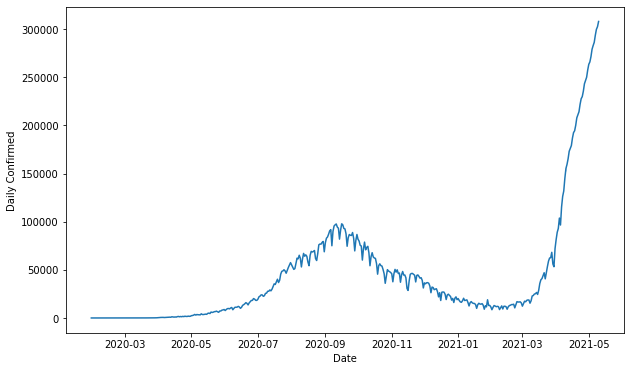

In [338]:

import seaborn as sns
sns.lineplot(data=P, x="Date", y="Daily Confirmed")